In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Connecting to the database
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "root",
                            database = "Amazon")
cur = db.cursor()

In [3]:
# Fetching data from database
query = """ select * from amazon_sales """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=cur.column_names)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,FALSE,Easy Ship,,
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,FALSE,Easy Ship,,
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,TRUE,,,
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,FALSE,Easy Ship,,
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,FALSE,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,19480,171-5019354-7733913,04-19-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,759.00,Vishakhapatnam,ANDHRA PRADESH,530046,IN,FALSE,,,
18294,19481,407-9686343-3056356,04-19-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,291.00,UDUPI,KARNATAKA,576101,IN,FALSE,,,
18295,19482,407-1206684-5828309,04-19-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,...,INR,521.00,UDUPI,KARNATAKA,576101,IN,FALSE,Easy Ship,,
18296,19483,403-3626407-2391517,04-19-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,...,INR,291.00,BELAGAVI,KARNATAKA,590001,IN,FALSE,,,


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [5]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code        int64
ship-country           object
B2B                    object
fulfilled-by           object
New                    object
PendingS               object
dtype: object

In [6]:
# Changing the datatype of date column
df['Date'] = pd.to_datetime(df['Date'])

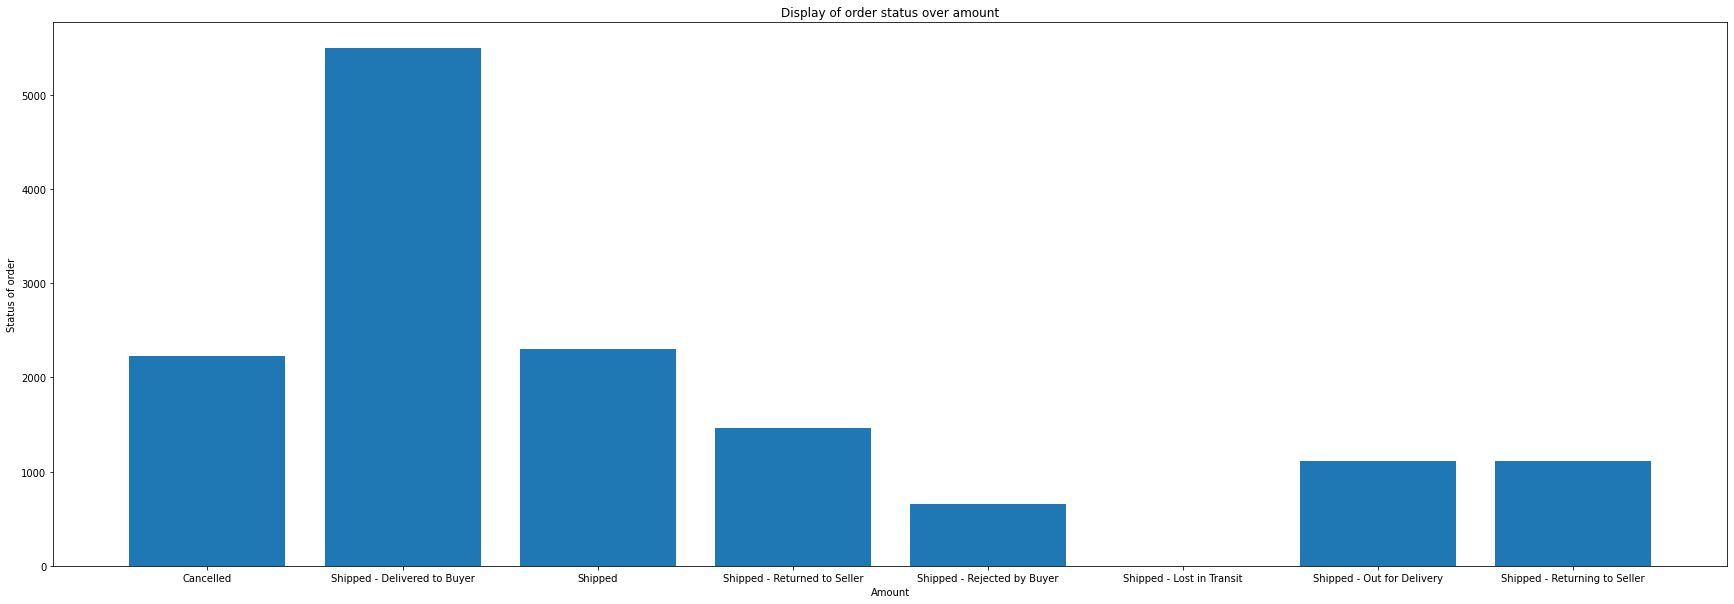

In [7]:
# Graph showing the status of order over amount generated
plt.figure(figsize=(30, 10))
plt.bar( df['Status'],df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Status of order')
plt.title('Display of order status over amount')
plt.show()

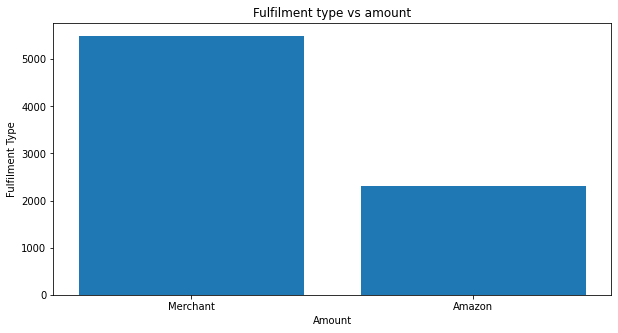

In [8]:
# Fulfilment type vs amount
plt.figure(figsize=(10, 5))
plt.bar( df['Fulfilment'],df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Fulfilment Type')
plt.title('Fulfilment type vs amount')
plt.show()

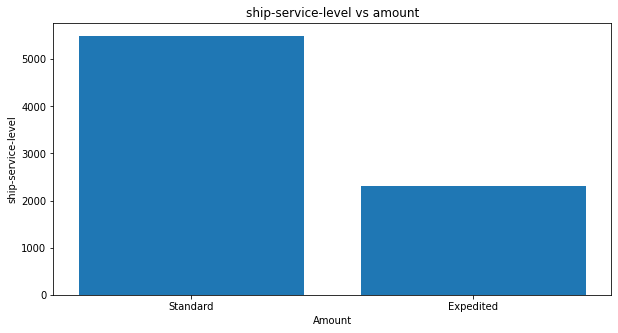

In [9]:
# ship-service-level vs amount
plt.figure(figsize=(10, 5))
plt.bar( df['ship-service-level'],df['Amount'])
plt.xlabel('Amount')
plt.ylabel('ship-service-level')
plt.title('ship-service-level vs amount')
plt.show()

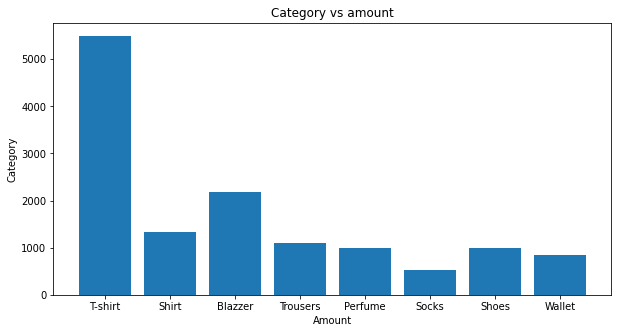

In [10]:
# Category vs amount
plt.figure(figsize=(10, 5))
plt.bar( df['Category'],df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Category vs amount')
plt.show()

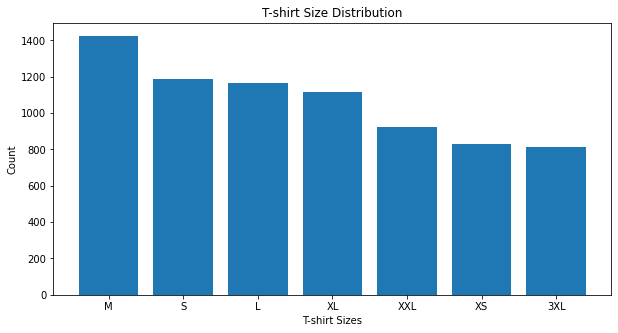

In [11]:
# T-shirt Size Distribution
plt.figure(figsize=(10, 5))
x = df[df['Category']== "T-shirt"]
    
y = x['Size'].value_counts()
plt.bar(y.index, y.values)
plt.xlabel('T-shirt Sizes')
plt.ylabel('Count')
plt.title('T-shirt Size Distribution')
plt.show()

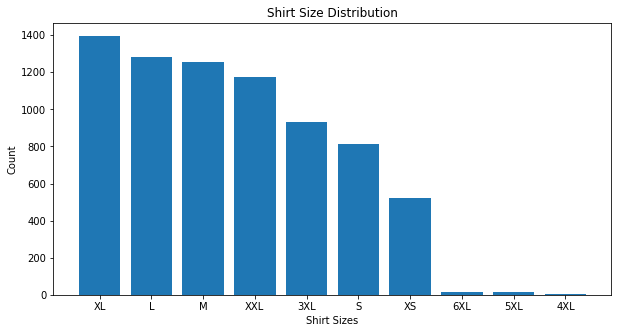

In [12]:
# Shirt Size Distribution
plt.figure(figsize=(10, 5))
x = df[df['Category']== "Shirt"]
    
y = x['Size'].value_counts()
plt.bar(y.index, y.values)
plt.xlabel('Shirt Sizes')
plt.ylabel('Count')
plt.title('Shirt Size Distribution')
plt.show()

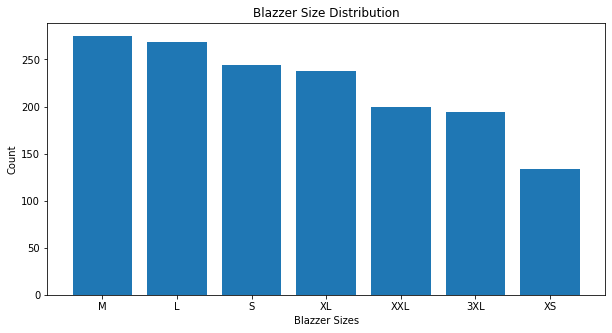

In [13]:
# Blazzer Size Distribution
plt.figure(figsize=(10, 5))
x = df[df['Category']== "Blazzer"]
    
y = x['Size'].value_counts()
plt.bar(y.index, y.values)
plt.xlabel('Blazzer Sizes')
plt.ylabel('Count')
plt.title('Blazzer Size Distribution')
plt.show()

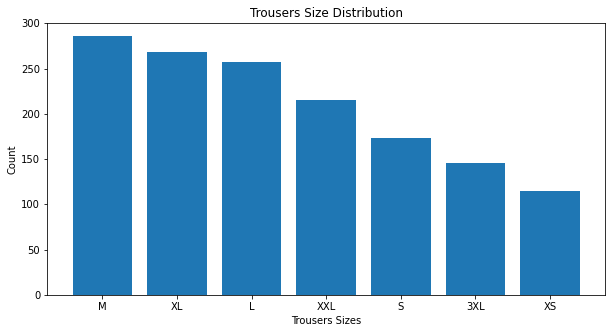

In [14]:
# Trousers Size Distribution
plt.figure(figsize=(10, 5))
x = df[df['Category']== "Trousers"]
    
y = x['Size'].value_counts()
plt.bar(y.index, y.values)
plt.xlabel('Trousers Sizes')
plt.ylabel('Count')
plt.title('Trousers Size Distribution')
plt.show()

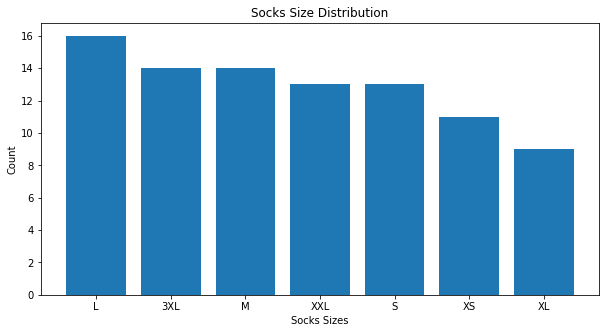

In [15]:
# Socks Size Distribution
plt.figure(figsize=(10, 5))
x = df[df['Category']== "Socks"]
    
y = x['Size'].value_counts()
plt.bar(y.index, y.values)
plt.xlabel('Socks Sizes')
plt.ylabel('Count')
plt.title('Socks Size Distribution')
plt.show()

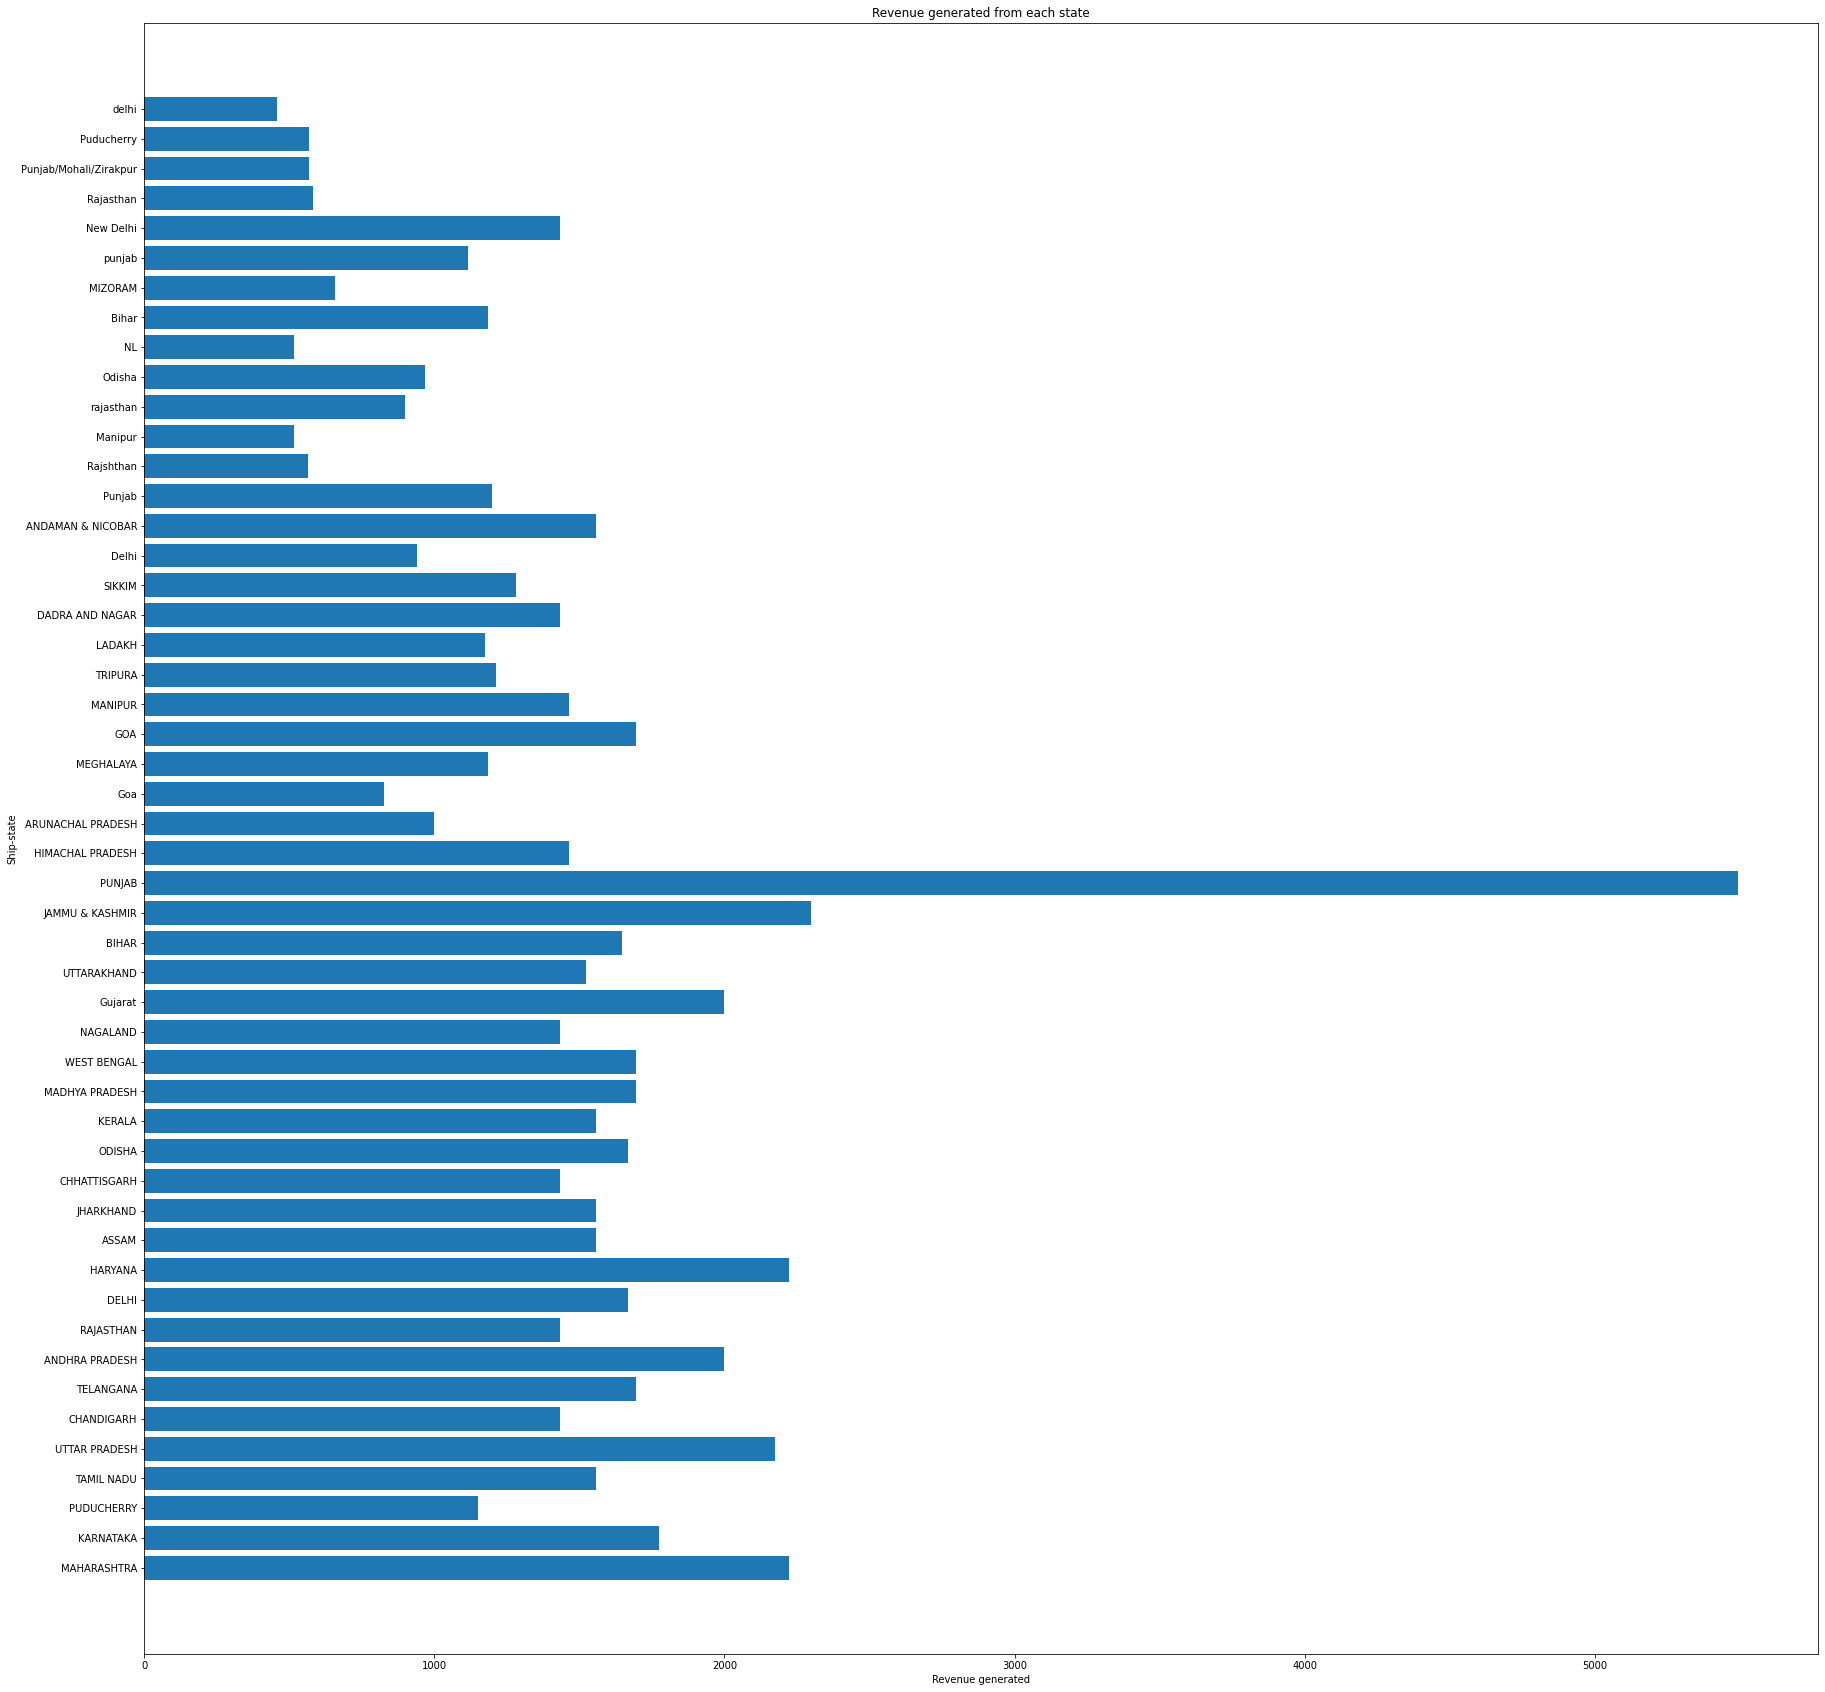

In [16]:
# Revenue generated from each state
plt.figure(figsize=(30, 30))
plt.barh(df["ship-state"], df["Amount"])
plt.xlabel('Revenue generated')
plt.ylabel('Ship-state')
plt.title('Revenue generated from each state')
plt.show()